#Read the Data

In [ ]:
import pandas as pd
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#Seperate features and target variables as per requirement

In [ ]:
#Features
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
#Labels
Y = df[['Species']]

#Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

In [ ]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

print('#########################')

print(Y.shape)
print(ytrain.shape)
print(ytest.shape)

(150, 4)
(112, 4)
(38, 4)
#########################
(150, 1)
(112, 1)
(38, 1)


#Import the algorithm and define model for training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=5)

In [ ]:
ytrain.columns

Index(['Species'], dtype='object')

#Train Your Model

In [ ]:
#fit function used for training or train a model
kmodel.fit(xtrain,ytrain['Species'].ravel())

KNeighborsClassifier()

#Evaluate or validate or test your model

In [ ]:
#predict function is used to predict the output
#Model performance on known data i.e training data

print((kmodel.predict(xtrain).reshape(-1,1) == ytrain).sum() / len(xtrain))
print(kmodel.score(xtrain,ytrain))


#Model performance on unknown data for the model

print((kmodel.predict(xtest).reshape(-1,1) == ytest).sum() / len(xtest))
print(kmodel.score(xtest,ytest))

Species    0.964286
dtype: float64
0.9642857142857143
Species    0.973684
dtype: float64
0.9736842105263158


#Make predictions for new input values

In [ ]:
#iris flower - [[3.2,3.1,2.6,2.6]]
print(kmodel.predict([[3.2,3.1,2.6,2.6]]))

['Iris-versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#5-fold Cross validation

In [ ]:
training_acc = []
testing_acc = []

for i in range(10):
  xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

  kmodel.fit(xtrain,ytrain)

  training_acc.append(kmodel.score(xtrain,ytrain))
  testing_acc.append(kmodel.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
import numpy as np

print(np.array(training_acc).mean())
print(np.array(testing_acc).mean())

0.9723214285714287
0.9631578947368421


In [ ]:
print(kmodel.predict([[1.2,1.1,1.6,0.6]]))

['Iris-setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


#Hyper Parameter Tuning - K

In [ ]:
#Requirement - training and testing accuracy should be as close as possible
#if training accuracy >>>>>>>>> testing accuracy --- over fit model

tr_acc = []
ts_acc = []

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

for i in range(1,15):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(xtrain,ytrain)

  tr_acc.append(model.score(xtrain,ytrain))
  ts_acc.append(model.score(xtest,ytest))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
print(tr_acc)
print(ts_acc)

[1.0, 0.9642857142857143, 0.9821428571428571, 0.9910714285714286, 0.9910714285714286, 0.9910714285714286, 0.9821428571428571, 0.9821428571428571, 0.9821428571428571, 0.9732142857142857, 0.9821428571428571, 0.9642857142857143, 0.9732142857142857, 0.9642857142857143]
[0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9210526315789473, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


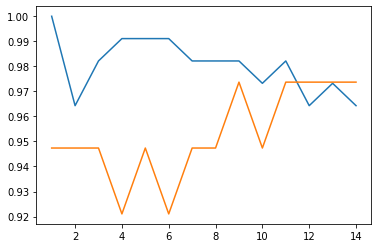

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,15) , tr_acc)
plt.plot(range(1,15) , ts_acc)

plt.show()

In [ ]:
#We will go for new topic in next session as i am facing bad network today...

#Assignment : - https://www.kaggle.com/fedesoriano/heart-failure-prediction

#Use the heart failure data to make a model which can identify the possibility of heart desease and calculate the accuracy of the model as well